<a href="https://colab.research.google.com/github/nightsky09/BuildingHeight/blob/master/major_project_test2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
from google.colab import files

# Ask user to upload dataset
print("📂 Please upload your dataset file (ZIP or individual files)")
uploaded = files.upload()  # Opens file selection dialog

# Get uploaded filename
uploaded_filename = list(uploaded.keys())[0]
print(f"\n✅ Uploaded file: {uploaded_filename}")

# Define extraction path
extract_path = "/content/data"

# If it's a ZIP file, extract it
if uploaded_filename.endswith(".zip"):
    with zipfile.ZipFile(uploaded_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"\n📂 Dataset extracted to: {extract_path}")
else:
    extract_path = "/content"
    print("\n⚠️ File is not a ZIP. Using uploaded file directly.")

# Confirm dataset files
print("\n📄 Files in dataset folder:")
print(os.listdir(extract_path))


📂 Please upload your dataset file (ZIP or individual files)


Saving archive.zip to archive.zip

✅ Uploaded file: archive.zip

📂 Dataset extracted to: /content/data

📄 Files in dataset folder:
['Semantic segmentation dataset']


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset path
data_dir = "/content/data/Semantic segmentation dataset"

# List files inside dataset folder
print("📄 Files in dataset:", os.listdir(data_dir))

# Function to display images
def show_images(data_dir, num_images=4):
    images = [f for f in os.listdir(data_dir) if f.endswith((".jpg", ".png"))]

    if not images:
        print("⚠️ No images found in the dataset folder!")
        return

    plt.figure(figsize=(10, 5))
    for i in range(min(num_images, len(images))):
        img = cv2.imread(os.path.join(data_dir, images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# Display images
show_images(data_dir)


📄 Files in dataset: ['Tile 5', 'Tile 6', 'classes.json', 'Tile 7', 'Tile 3', 'Tile 1', 'Tile 2', 'Tile 8', 'Tile 4']
⚠️ No images found in the dataset folder!


📸 Found 144 images in dataset.


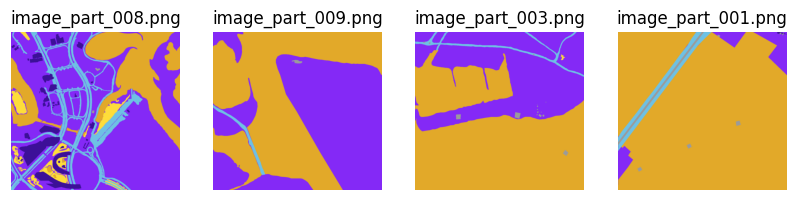

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset path
data_dir = "/content/data/Semantic segmentation dataset"

# Function to find images inside subfolders
def find_images(root_dir):
    image_paths = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith((".jpg", ".png")):  # Add more formats if needed
                image_paths.append(os.path.join(subdir, file))
    return image_paths

# Get image file paths
image_paths = find_images(data_dir)

# Show found image paths
print(f"📸 Found {len(image_paths)} images in dataset.")

# Function to display sample images
def show_images(image_paths, num_images=4):
    if len(image_paths) == 0:
        print("⚠️ No images found in any subfolders!")
        return

    plt.figure(figsize=(10, 5))
    for i in range(min(num_images, len(image_paths))):
        img = cv2.imread(image_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(os.path.basename(image_paths[i]))  # Show filename
        plt.axis("off")
    plt.show()

# Display images
show_images(image_paths)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define dataset paths
image_dir = "/content/data/Semantic segmentation dataset"

# Find images again
image_paths = find_images(image_dir)

# Set image dimensions for model
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Adjust based on dataset

# Function to load and preprocess images
def load_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))  # Resize
    img = img_to_array(img) / 255.0  # Normalize
    return img

# Load all images
X = np.array([load_image(img) for img in image_paths])

print(f"✅ Loaded {len(X)} images, shape: {X.shape}")


✅ Loaded 144 images, shape: (144, 128, 128, 3)


In [5]:
# Check all dataset subfolders
print("📂 Subfolders inside dataset:", os.listdir(image_dir))


📂 Subfolders inside dataset: ['Tile 5', 'Tile 6', 'classes.json', 'Tile 7', 'Tile 3', 'Tile 1', 'Tile 2', 'Tile 8', 'Tile 4']


In [6]:
tile_path = os.path.join(image_dir, "Tile 1")
print("📂 Files inside Tile 1:", os.listdir(tile_path))


📂 Files inside Tile 1: ['masks', 'images']


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from glob import glob

# Set image dimensions for model
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Adjust based on dataset

# Initialize empty lists
image_files = []
mask_files = []

# Loop through all Tile folders
for tile_num in range(1, 9):  # Tiles 1 to 8
    tile_path = os.path.join(image_dir, f"Tile {tile_num}")

    # Find all images & masks inside the tile folder
    image_files.extend(glob(os.path.join(tile_path, "images", "*.png")))  # Adjust if JPG
    mask_files.extend(glob(os.path.join(tile_path, "masks", "*.png")))  # Adjust if JPG

# Sort to ensure matching pairs
image_files.sort()
mask_files.sort()

# Function to load and preprocess images/masks
def load_image(image_path, is_mask=False):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale" if is_mask else "rgb")
    img = img_to_array(img) / 255.0  # Normalize pixel values
    return img

# Load all images & masks
X = np.array([load_image(img) for img in image_files])
Y = np.array([load_image(mask, is_mask=True) for mask in mask_files])

# Ensure masks have a single channel
Y = Y[..., 0:1]

# Print dataset shape
print(f"✅ Loaded {len(X)} images, shape: {X.shape}")
print(f"✅ Loaded {len(Y)} masks, shape: {Y.shape}")


✅ Loaded 0 images, shape: (0,)
✅ Loaded 72 masks, shape: (72, 128, 128, 1)


In [8]:
import os

# Check image folder in Tile 1
tile_1_images_path = os.path.join(image_dir, "Tile 1", "images")

# List the files inside the images folder
print("📂 Files inside Tile 1/images:", os.listdir(tile_1_images_path))


📂 Files inside Tile 1/images: ['image_part_007.jpg', 'image_part_006.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_001.jpg', 'image_part_003.jpg', 'image_part_009.jpg', 'image_part_005.jpg', 'image_part_002.jpg']


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from glob import glob

# Set image dimensions for model
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Adjust if needed

# Initialize empty lists
image_files = []
mask_files = []

# Loop through all Tile folders
for tile_num in range(1, 9):  # Tiles 1 to 8
    tile_path = os.path.join(image_dir, f"Tile {tile_num}")

    # Load images (fixing format to .jpg)
    image_files.extend(glob(os.path.join(tile_path, "images", "*.jpg")))  # Changed from .png to .jpg

    # Load masks (keep .png)
    mask_files.extend(glob(os.path.join(tile_path, "masks", "*.png")))

# Sort to ensure correct matching (image ↔ mask)
image_files.sort()
mask_files.sort()

# Function to load and preprocess images/masks
def load_image(image_path, is_mask=False):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale" if is_mask else "rgb")
    img = img_to_array(img) / 255.0  # Normalize pixel values
    return img

# Load all images & masks
X = np.array([load_image(img) for img in image_files])
Y = np.array([load_image(mask, is_mask=True) for mask in mask_files])

# Ensure masks have a single channel
Y = Y[..., 0:1]

# Print dataset shape
print(f"✅ Loaded {len(X)} images, shape: {X.shape}")
print(f"✅ Loaded {len(Y)} masks, shape: {Y.shape}")


✅ Loaded 72 images, shape: (72, 128, 128, 3)
✅ Loaded 72 masks, shape: (72, 128, 128, 1)


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"✅ Training set: {len(X_train)} images, {len(Y_train)} masks")
print(f"✅ Validation set: {len(X_val)} images, {len(Y_val)} masks")


✅ Training set: 57 images, 57 masks
✅ Validation set: 15 images, 15 masks


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

# U-Net Model
def build_unet(input_shape=(128, 128, 3)):
    inputs = Input(input_shape)

    # Encoder (Downsampling)
    c1 = Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(p2)

    # Decoder (Upsampling)
    u1 = UpSampling2D((2,2))(c3)
    u1 = Concatenate()([u1, c2])

    c4 = Conv2D(32, (3,3), activation='relu', padding='same')(u1)
    u2 = UpSampling2D((2,2))(c4)
    u2 = Concatenate()([u2, c1])

    c5 = Conv2D(16, (3,3), activation='relu', padding='same')(u2)
    outputs = Conv2D(1, (1,1), activation='sigmoid')(c5)  # Binary segmentation

    return tf.keras.Model(inputs, outputs)

# Build model
model = build_unet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 16)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 32)     │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_2[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 96)     │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 32)     │         27,680 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 128, 128, 32)   │              0 │ conv2d_3[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 48)   │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 16)   │          6,928 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 1)    │             17 │ conv2d_4[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 58,209 (227.38 KB)

 Trainable params: 58,209 (227.38 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,  # You can increase this for better performance
    batch_size=8,  # Reduce if you face memory issues
    verbose=1
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 480ms/step - accuracy: 0.0025 - loss: 0.6849 - val_accuracy: 8.1380e-06 - val_loss: 0.6827
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0025 - loss: 0.6797 - val_accuracy: 8.1380e-06 - val_loss: 0.6756
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 8.4479e-04 - loss: 0.6721 - val_accuracy: 1.2207e-05 - val_loss: 0.6733
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0018 - loss: 0.6716 - val_accuracy: 1.2207e-05 - val_loss: 0.6669
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0032 - loss: 0.6639 - val_accuracy: 1.2207e-05 - val_loss: 0.6681
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 6.7990e-04 - loss: 0.6727 - val_accuracy: 1.2207e-05 - val_loss: 0.6671
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0033 - loss: 0.6645 - val_accuracy: 0.0000e+00 - val_loss: 0.6654
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0018 - loss: 0.6633 - val

In [13]:
import tensorflow.keras.backend as K
import tensorflow as tf

# Fix: Ensure correct loss function
def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)  # Flatten tensors
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

# Fix: Compile model correctly
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=dice_loss,
              metrics=['accuracy'])

# Retry training
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=25,  # Increased epochs
    batch_size=8,
    verbose=1
)


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 5.7812e-04 - loss: 0.4179 - val_accuracy: 0.0000e+00 - val_loss: 0.3580
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 0.3499 - val_accuracy: 0.0000e+00 - val_loss: 0.3561
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.3619 - val_accuracy: 0.0000e+00 - val_loss: 0.3560
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.3480 - val_accuracy: 0.0000e+00 - val_loss: 0.3560
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.3578 - val_accuracy: 0.0000e+00 - val_loss: 0.3560
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.3464 - val_accuracy: 0.0000e+00 - val_loss: 0.3560
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.3420 - val_accuracy: 0.0000e+00 - val_loss: 0.3560
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e

In [14]:
# Convert masks to binary (0 or 1)
Y_train = (Y_train > 0.5).astype(np.float32)
Y_val = (Y_val > 0.5).astype(np.float32)

# Compile model with Binary Crossentropy Loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train again
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=25,
    batch_size=8,
    verbose=1
)


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.3881 - loss: 41.8966 - val_accuracy: 0.3948 - val_loss: 8.7505
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4045 - loss: 6.2652 - val_accuracy: 0.3948 - val_loss: 1.4840
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4077 - loss: 1.1295 - val_accuracy: 0.8045 - val_loss: 0.6215
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8101 - loss: 0.6120 - val_accuracy: 0.7313 - val_loss: 0.6000
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7498 - loss: 0.5779 - val_accuracy: 0.7199 - val_loss: 0.5367
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7770 - loss: 0.4988 - val_accuracy: 0.7703 - val_loss: 0.5485
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8461 - loss: 0.4703 - val_accuracy: 0.8257 - val_loss: 0.4498
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8162 - loss: 0.4332 - val_accuracy: 0.8233 - val_loss: 0.430

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


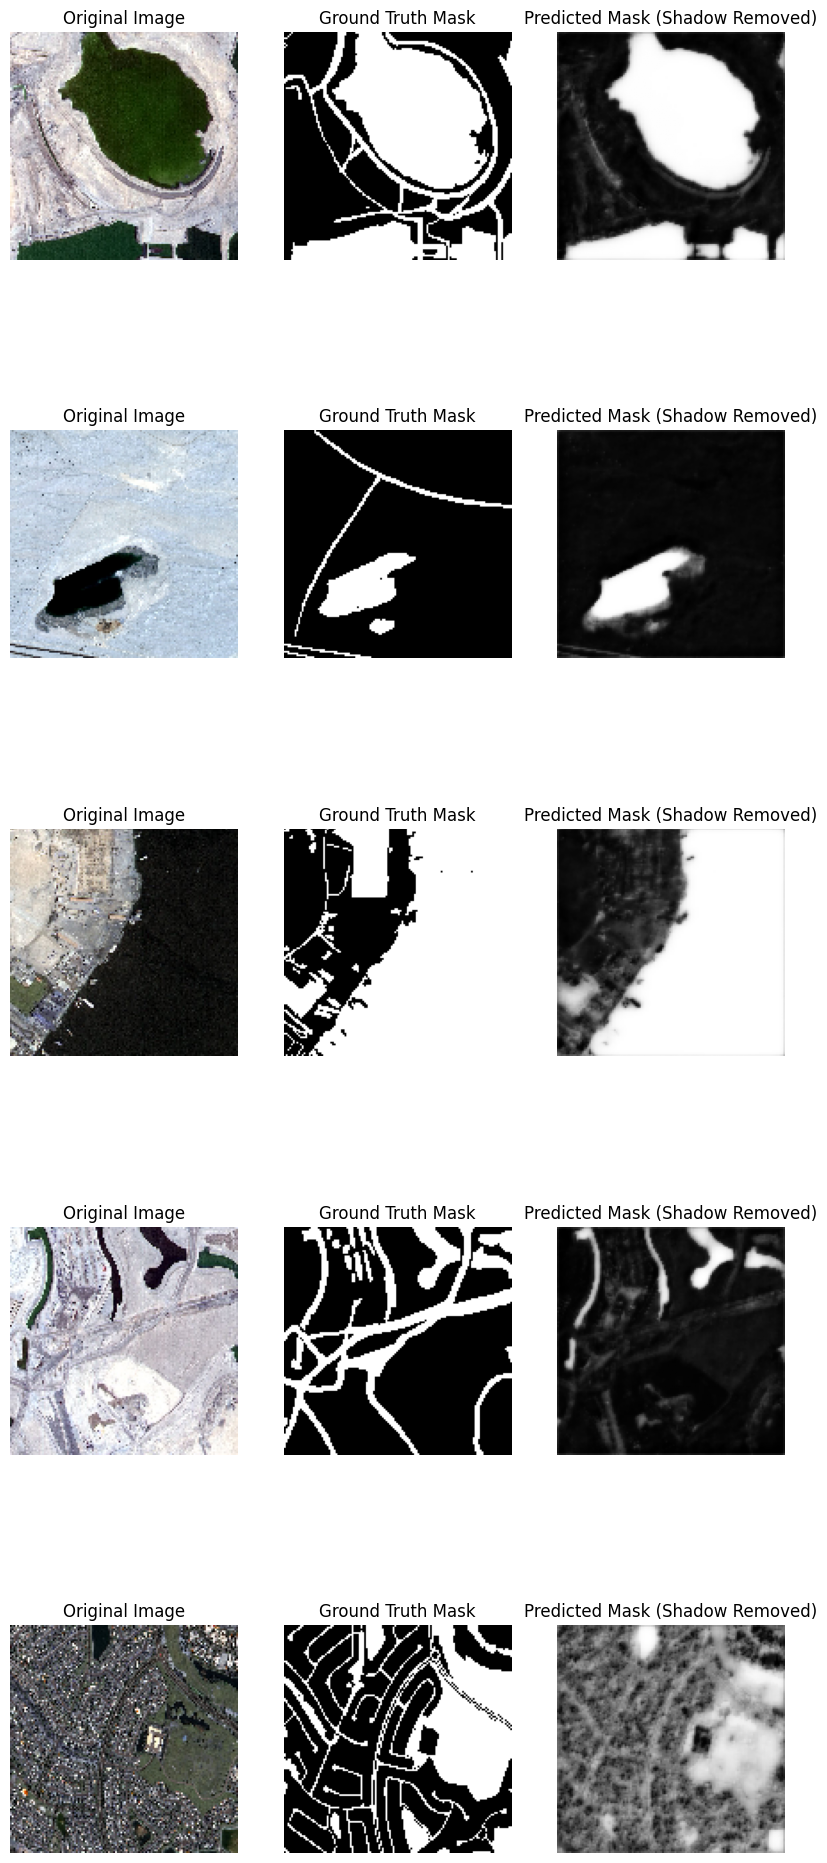

In [15]:
import matplotlib.pyplot as plt

# Function to visualize predictions
def show_predictions(model, X_sample, Y_sample, num_samples=5):
    preds = model.predict(X_sample[:num_samples])  # Get model predictions

    plt.figure(figsize=(10, num_samples * 5))

    for i in range(num_samples):
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(X_sample[i])
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(Y_sample[i].squeeze(), cmap="gray")
        plt.title("Ground Truth Mask")
        plt.axis("off")

        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(preds[i].squeeze(), cmap="gray")
        plt.title("Predicted Mask (Shadow Removed)")
        plt.axis("off")

    plt.show()

# Show results on validation set
show_predictions(model, X_val, Y_val, num_samples=5)


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
model.save('/content/drive/MyDrive/my_model.h5')


In [18]:
model.save('/content/drive/MyDrive/my_model.keras')


In [20]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/my_model.keras')


In [21]:
sample_pred = model.predict(X_val[:1])  # Run prediction on a sample
print(sample_pred.shape)  # Check if output is valid


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
(1, 128, 128, 1)
